<a href="https://colab.research.google.com/github/vethssvikas/Work-done-in-DS-internship/blob/main/Analysis_using_spacy_and_text_blob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_file = '/content/gdrive/My Drive/trainingg.csv'

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving trainingg.csv to trainingg.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['trainingg.csv']))

In [ ]:
df2.head()

,text
0,But the staff was so horrible to us.
1,To be completely fair[comma] the only redeemin...
2,The food is uniformly exceptional[comma] with ...
3,The food is uniformly exceptional[comma] with ...
4,The food is uniformly exceptional[comma] with ...


In [ ]:
def parse_data(data):
    data[' text'] = data[' text'].apply(lambda x: x.replace('[comma]',',').lower())
    return data

parse_data(df2)

,text
0,but the staff was so horrible to us.
1,"to be completely fair, the only redeeming fact..."
2,"the food is uniformly exceptional, with a very..."
3,"the food is uniformly exceptional, with a very..."
4,"the food is uniformly exceptional, with a very..."
...,...
3597,each table has a pot of boiling water sunken i...
3598,each table has a pot of boiling water sunken i...
3599,each table has a pot of boiling water sunken i...
3600,each table has a pot of boiling water sunken i...


In [ ]:
df2.size

3602

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
for i in range(3602):
  for s in df2.loc[i]:
    doc = nlp(s)
    for token in doc:
      print(token.text, token.dep_, token.head.text, token.head.pos_, token.pos_,[child for child in token.children])

Streaming output truncated to the last 5000 lines.
the det staff NOUN DET []
all advmod italian ADJ ADV []
- punct italian ADJ PUNCT []
italian amod staff NOUN ADJ [all, -]
staff nsubj is AUX NOUN [the, italian]
is ROOT is AUX AUX [staff, warm, .]
warm acomp is AUX ADJ [and, engaging]
and cc warm ADJ CCONJ []
engaging conj warm ADJ VERB [from]
from prep engaging VERB ADP [start]
the det start NOUN DET []
start pobj from ADP NOUN [the]
. punct is AUX PUNCT []
the det prices NOUN DET []
prices nsubj are AUX NOUN [the]
are ROOT are AUX AUX [prices, reasonable, .]
exceptionally advmod reasonable ADJ ADV []
reasonable acomp are AUX ADJ [exceptionally, for]
for prep reasonable ADJ ADP [food]
food pobj for ADP NOUN [of]
of prep food NOUN ADP [caliber]
this det caliber NOUN DET []
caliber pobj of ADP NOUN [this]
. punct are AUX PUNCT []
the det prices NOUN DET []
prices nsubj are AUX NOUN [the]
are ROOT are AUX AUX [prices, reasonable, .]
exceptionally advmod reasonable ADJ ADV []
reasonable a

In [ ]:
aspects = []
for i in range(3602):
  for s in df2.loc[i]:
    doc = nlp(s)
    descriptive_term = ''
    target = ''
    for token in doc:
      if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
        target = token.text
      if token.pos_ == 'ADJ':
        prepend = ''
        for child in token.children:

          if child.pos_ != 'ADV':

             continue
          prepend += child.text + ' '
        descriptive_term = prepend + token.text
    aspects.append({'aspect': target,
 'description': descriptive_term})
print(aspects)


 

[{'aspect': 'staff', 'description': 'so horrible'}, {'aspect': 'factor', 'description': 'other'}, {'aspect': 'food', 'description': 'very capable'}, {'aspect': 'food', 'description': 'very capable'}, {'aspect': 'food', 'description': 'very capable'}, {'aspect': 'perks', 'description': 'great'}, {'aspect': 'perks', 'description': 'great'}, {'aspect': 'waiters', 'description': 'kind'}, {'aspect': 'waiters', 'description': 'kind'}, {'aspect': 'waiters', 'description': 'kind'}, {'aspect': 'waiters', 'description': 'kind'}, {'aspect': 'chewy', 'description': 'gummy'}, {'aspect': 'food', 'description': 'pretty good'}, {'aspect': 'bacon', 'description': 'hot'}, {'aspect': 'bacon', 'description': 'hot'}, {'aspect': 'bacon', 'description': 'hot'}, {'aspect': 'bacon', 'description': 'hot'}, {'aspect': 'bacon', 'description': 'hot'}, {'aspect': 'bacon', 'description': 'hot'}, {'aspect': 'bacon', 'description': 'hot'}, {'aspect': '', 'description': 'perfect'}, {'aspect': '', 'description': 'perfec

In [ ]:


from textblob import TextBlob
for aspect in aspects:
 aspect['sentiment'] = TextBlob(aspect['description']).sentiment.polarity
print(aspects)

[{'aspect': 'staff', 'description': 'so horrible', 'sentiment': -1.0}, {'aspect': 'factor', 'description': 'other', 'sentiment': -0.125}, {'aspect': 'food', 'description': 'very capable', 'sentiment': 0.26}, {'aspect': 'food', 'description': 'very capable', 'sentiment': 0.26}, {'aspect': 'food', 'description': 'very capable', 'sentiment': 0.26}, {'aspect': 'perks', 'description': 'great', 'sentiment': 0.8}, {'aspect': 'perks', 'description': 'great', 'sentiment': 0.8}, {'aspect': 'waiters', 'description': 'kind', 'sentiment': 0.6}, {'aspect': 'waiters', 'description': 'kind', 'sentiment': 0.6}, {'aspect': 'waiters', 'description': 'kind', 'sentiment': 0.6}, {'aspect': 'waiters', 'description': 'kind', 'sentiment': 0.6}, {'aspect': 'chewy', 'description': 'gummy', 'sentiment': 0.0}, {'aspect': 'food', 'description': 'pretty good', 'sentiment': 0.475}, {'aspect': 'bacon', 'description': 'hot', 'sentiment': 0.25}, {'aspect': 'bacon', 'description': 'hot', 'sentiment': 0.25}, {'aspect': 'b

In [ ]:
df = pd.DataFrame(aspects)
df.drop('description', axis =1)




,aspect,sentiment
0,staff,-1.000
1,factor,-0.125
2,food,0.260
3,food,0.260
4,food,0.260
...,...,...
3597,table,0.000
3598,table,0.000
3599,table,0.000
3600,table,0.000


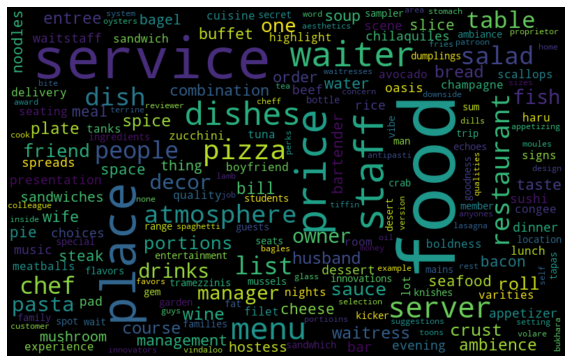

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fake_data = df[df["sentiment"] >= 0 ]
all_words = ' '.join([text for text in fake_data.aspect])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
